In [1]:
import pdfplumber
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

def extract_tables_from_pdf(pdf_path):
    all_dataframes = []
    header = None  # Variable to store the header

    with pdfplumber.open(pdf_path) as pdf:
        for page_num, page in enumerate(pdf.pages):
            tables = page.extract_tables()

            for table in tables:
                df = pd.DataFrame(table)

                # If header is not set, take it from the first row of the first table
                if header is None:
                    header = df.iloc[0]  # Take the first row as header
                    df.columns = header
                    df = df[1:]  # Drop the header row
                else:
                    df.columns = header

                all_dataframes.append(df)

    # Concatenate all dataframes
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    return combined_df

pdf_path = "Bank_Statement.pdf"
df = extract_tables_from_pdf(pdf_path)
print(df)


0         Date  Description  Amount Type
0   2022-06-06      Grocery   24.15   DR
1   2022-06-07         Mall  120.30   DR
2   2022-06-07         Food  446.83   DR
3   2022-06-11         Rent  223.38   DR
4   2022-06-14  Electricity   31.12   DR
..         ...          ...     ...  ...
95  2023-05-17         Mall  175.78   DR
96  2023-05-17          Bus   37.40   DR
97  2023-05-24      Grocery  398.76   DR
98  2023-06-01      Grocery  330.05   DR
99  2023-06-01     Internet  388.07   DR

[100 rows x 4 columns]


In [2]:
df.head()

,Date,Description,Amount,Type
0,2022-06-06,Grocery,24.15,DR
1,2022-06-07,Mall,120.30,DR
2,2022-06-07,Food,446.83,DR
3,2022-06-11,Rent,223.38,DR
4,2022-06-14,Electricity,31.12,DR


In [3]:
df.head()

,Date,Description,Amount,Type
0,2022-06-06,Grocery,24.15,DR
1,2022-06-07,Mall,120.30,DR
2,2022-06-07,Food,446.83,DR
3,2022-06-11,Rent,223.38,DR
4,2022-06-14,Electricity,31.12,DR


In [4]:
# sort transactions according to credited amount
df[df['Type'] == 'CR']

,Date,Description,Amount,Type
5,2022-06-20,Salary,144.07,CR
10,2022-07-03,Salary,345.55,CR
15,2022-08-01,Salary,402.10,CR
20,2022-08-22,Salary,161.71,CR
27,2022-09-12,Bank interest,162.68,CR
29,2022-09-17,Salary,277.45,CR
38,2022-11-04,Salary,73.42,CR
40,2022-11-10,Salary,453.01,CR
43,2023-01-01,Bank interest,388.85,CR
47,2023-01-10,Salary,329.51,CR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Description  100 non-null    object
 2   Amount       100 non-null    object
 3   Type         100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [6]:
# as Date is in object dtype we need to convert it in datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

In [7]:
# to change data type of amount from object to int 
df['Amount'] = df['Amount'].astype(float).astype('int64')
df.dtypes

0
Date           datetime64[ns]
Description            object
Amount                  int64
Type                   object
dtype: object

In [8]:
# to get total credited amount
df[df['Type']=='CR']['Amount'].sum()

5044

In [9]:
# to get total debited amount
df[df['Type']=='DR']['Amount'].sum()

19563

In [10]:
# to check how many entries are there in each month
df.groupby(df['Date'].dt.month)['Date'].count()

Date
1      5
2     10
3     18
4     13
5      9
6     11
7      6
8      9
9      7
10     7
11     3
12     2
Name: Date, dtype: int64

In [11]:
# to check transaction entries in specific month
df[df['Date'].dt.month == 5].count()

0
Date           9
Description    9
Amount         9
Type           9
dtype: int64

In [12]:
#creating a month column in dataframe
# df['Month'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.to_period('M')

In [13]:
df.dtypes

0
Date           datetime64[ns]
Description            object
Amount                  int64
Type                   object
Month               period[M]
dtype: object

In [14]:
#gives detail of how much is credited and debited each month
month_summary = df.groupby(['Month', 'Type'])['Amount'].sum()
month_summary

Month    Type
2022-06  CR       144
         DR      1644
2022-07  CR       345
         DR      1059
2022-08  CR       563
         DR      1760
2022-09  CR       439
         DR      1243
2022-10  DR      1646
2022-11  CR       526
         DR       454
2022-12  DR       743
2023-01  CR       717
         DR       973
2023-02  CR       384
         DR      2356
2023-03  CR      1376
         DR      2009
2023-04  CR       147
         DR      2788
2023-05  CR       403
         DR      2170
2023-06  DR       718
Name: Amount, dtype: int64

In [15]:
# Reset index to convert the 'YearMonth' index into a column
month_summary = month_summary.reset_index()
month_summary

,Month,Type,Amount
0,2022-06,CR,144
1,2022-06,DR,1644
2,2022-07,CR,345
3,2022-07,DR,1059
4,2022-08,CR,563
5,2022-08,DR,1760
6,2022-09,CR,439
7,2022-09,DR,1243
8,2022-10,DR,1646
9,2022-11,CR,526


In [16]:
# Find the row with the maximum transacted amount
max_amount_row = df.loc[df['Amount'].idxmax()]

max_amount_row

0
Date           2023-05-05 00:00:00
Description                   Food
Amount                         498
Type                            DR
Month                      2023-05
Name: 90, dtype: object

In [17]:
# Find the row with the minimum transacted amount
df.loc[df['Amount'].idxmin()]

0
Date           2023-03-07 00:00:00
Description                 Salary
Amount                          12
Type                            CR
Month                      2023-03
Name: 58, dtype: object

In [18]:
CR = df[df['Type']=='CR']
DR = df[df['Type']=='DR']

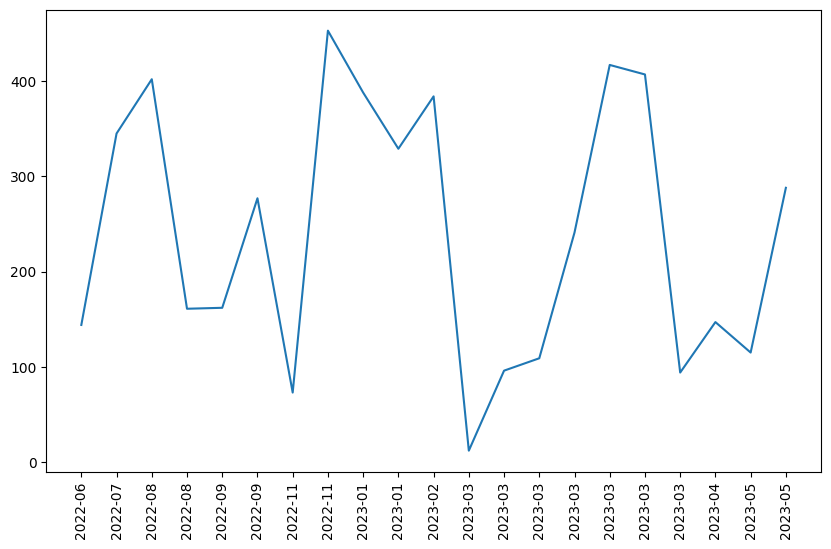

In [19]:
# Visualization of credited amount every month
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

# Plotting
x = CR['Month']
y = CR['Amount']
plt.plot(list(range(len(y))),y)
plt.xticks(list(range(len(y))), x, rotation = 90)

plt.show()

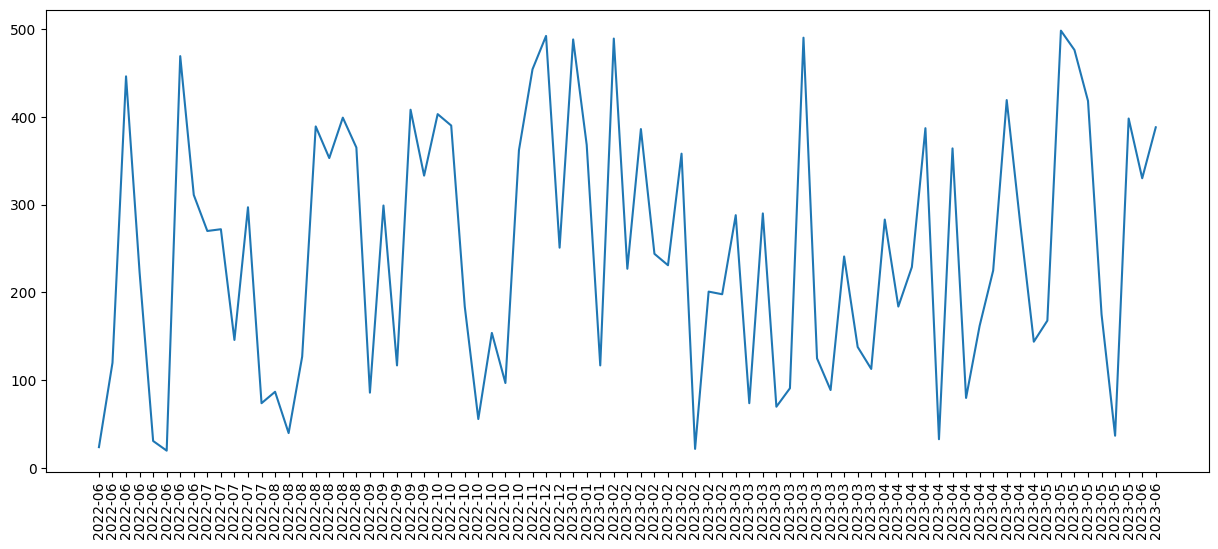

In [20]:
# Visualization of debited amount every month
plt.figure(figsize=(15, 6))  # Optional: Adjust figure size

# Plotting
x = DR['Month']
y = DR['Amount']
plt.plot(list(range(len(y))),y)
plt.xticks(list(range(len(y))), x, rotation = 90)

plt.show()